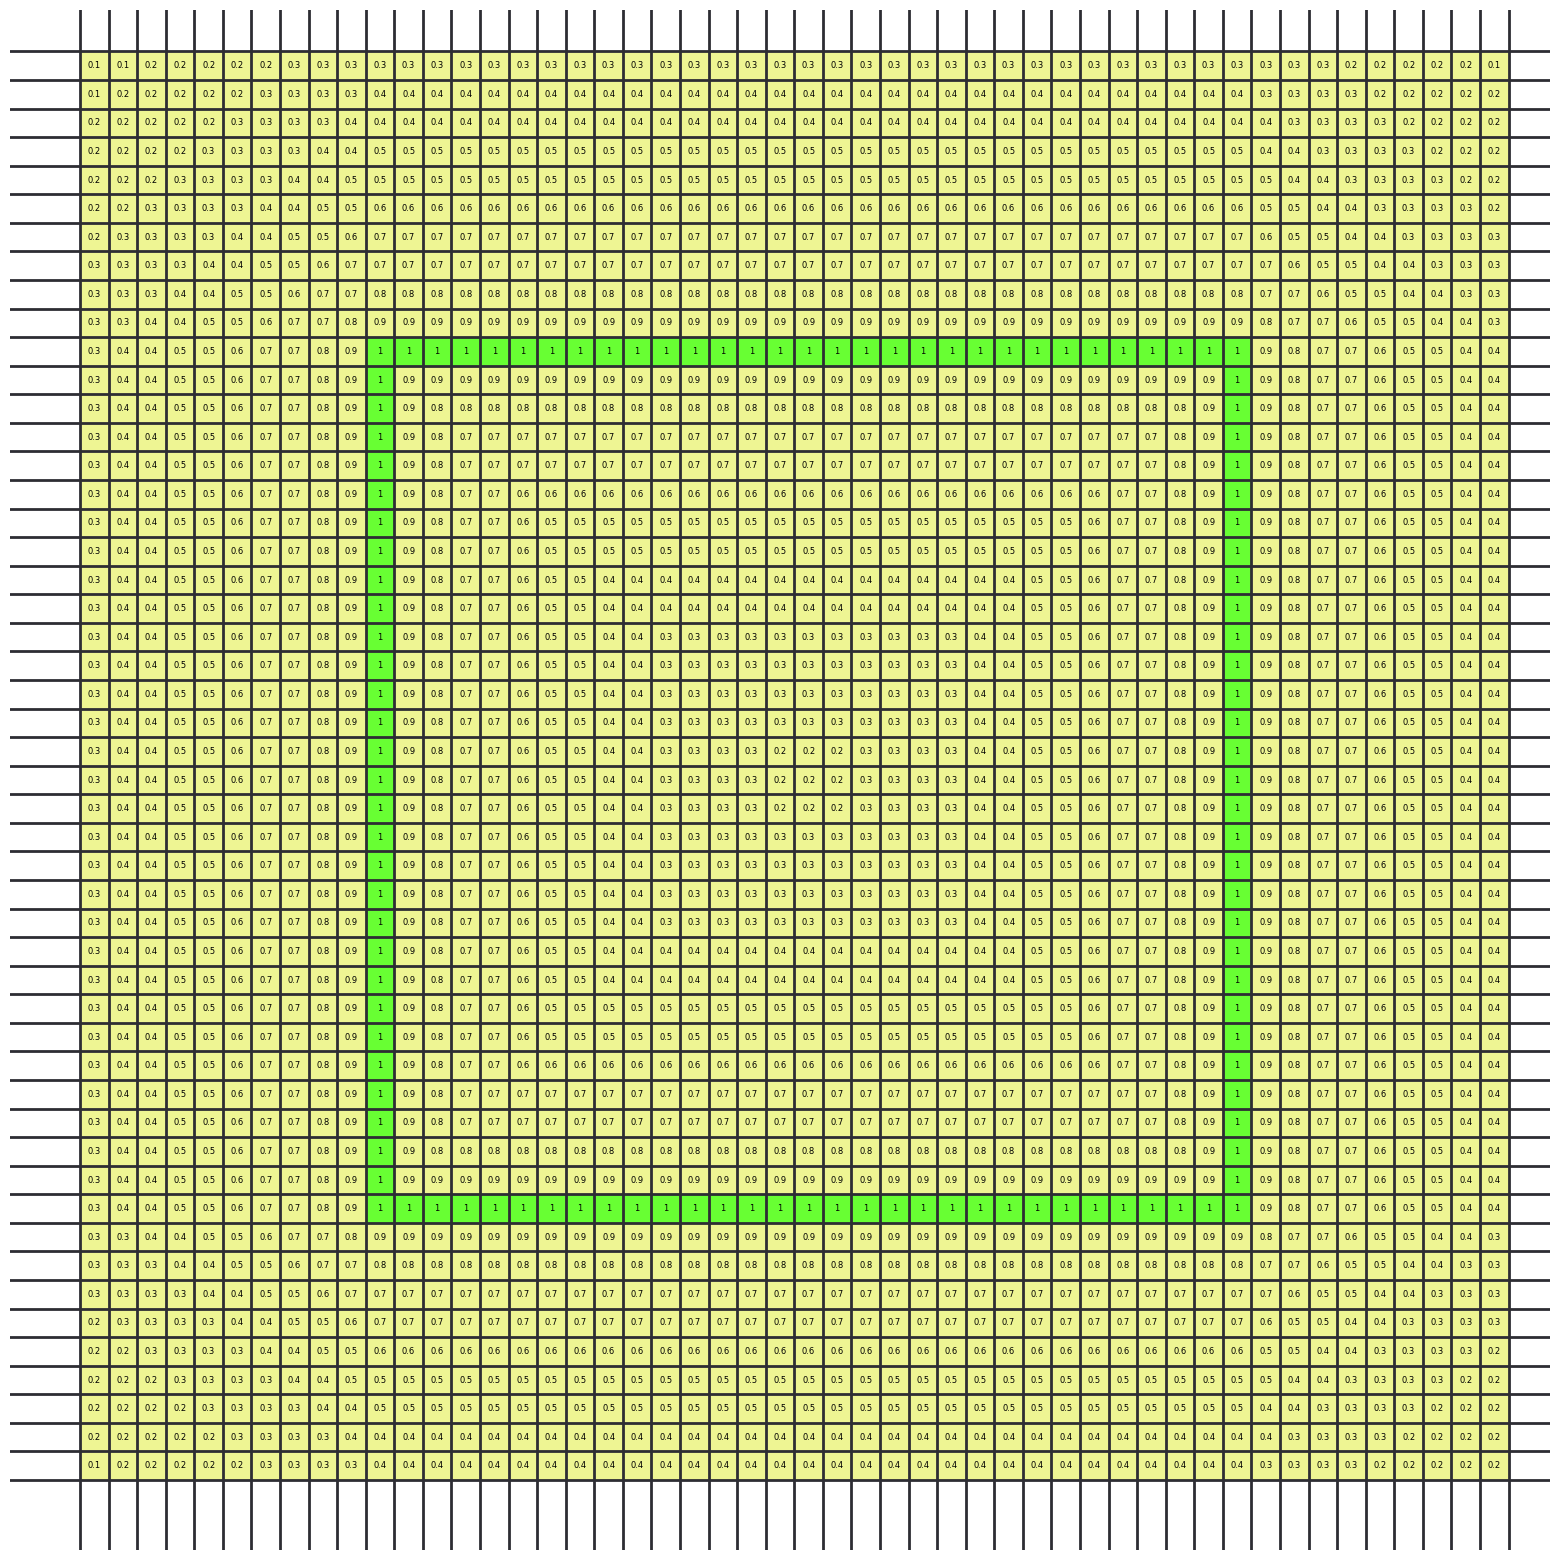

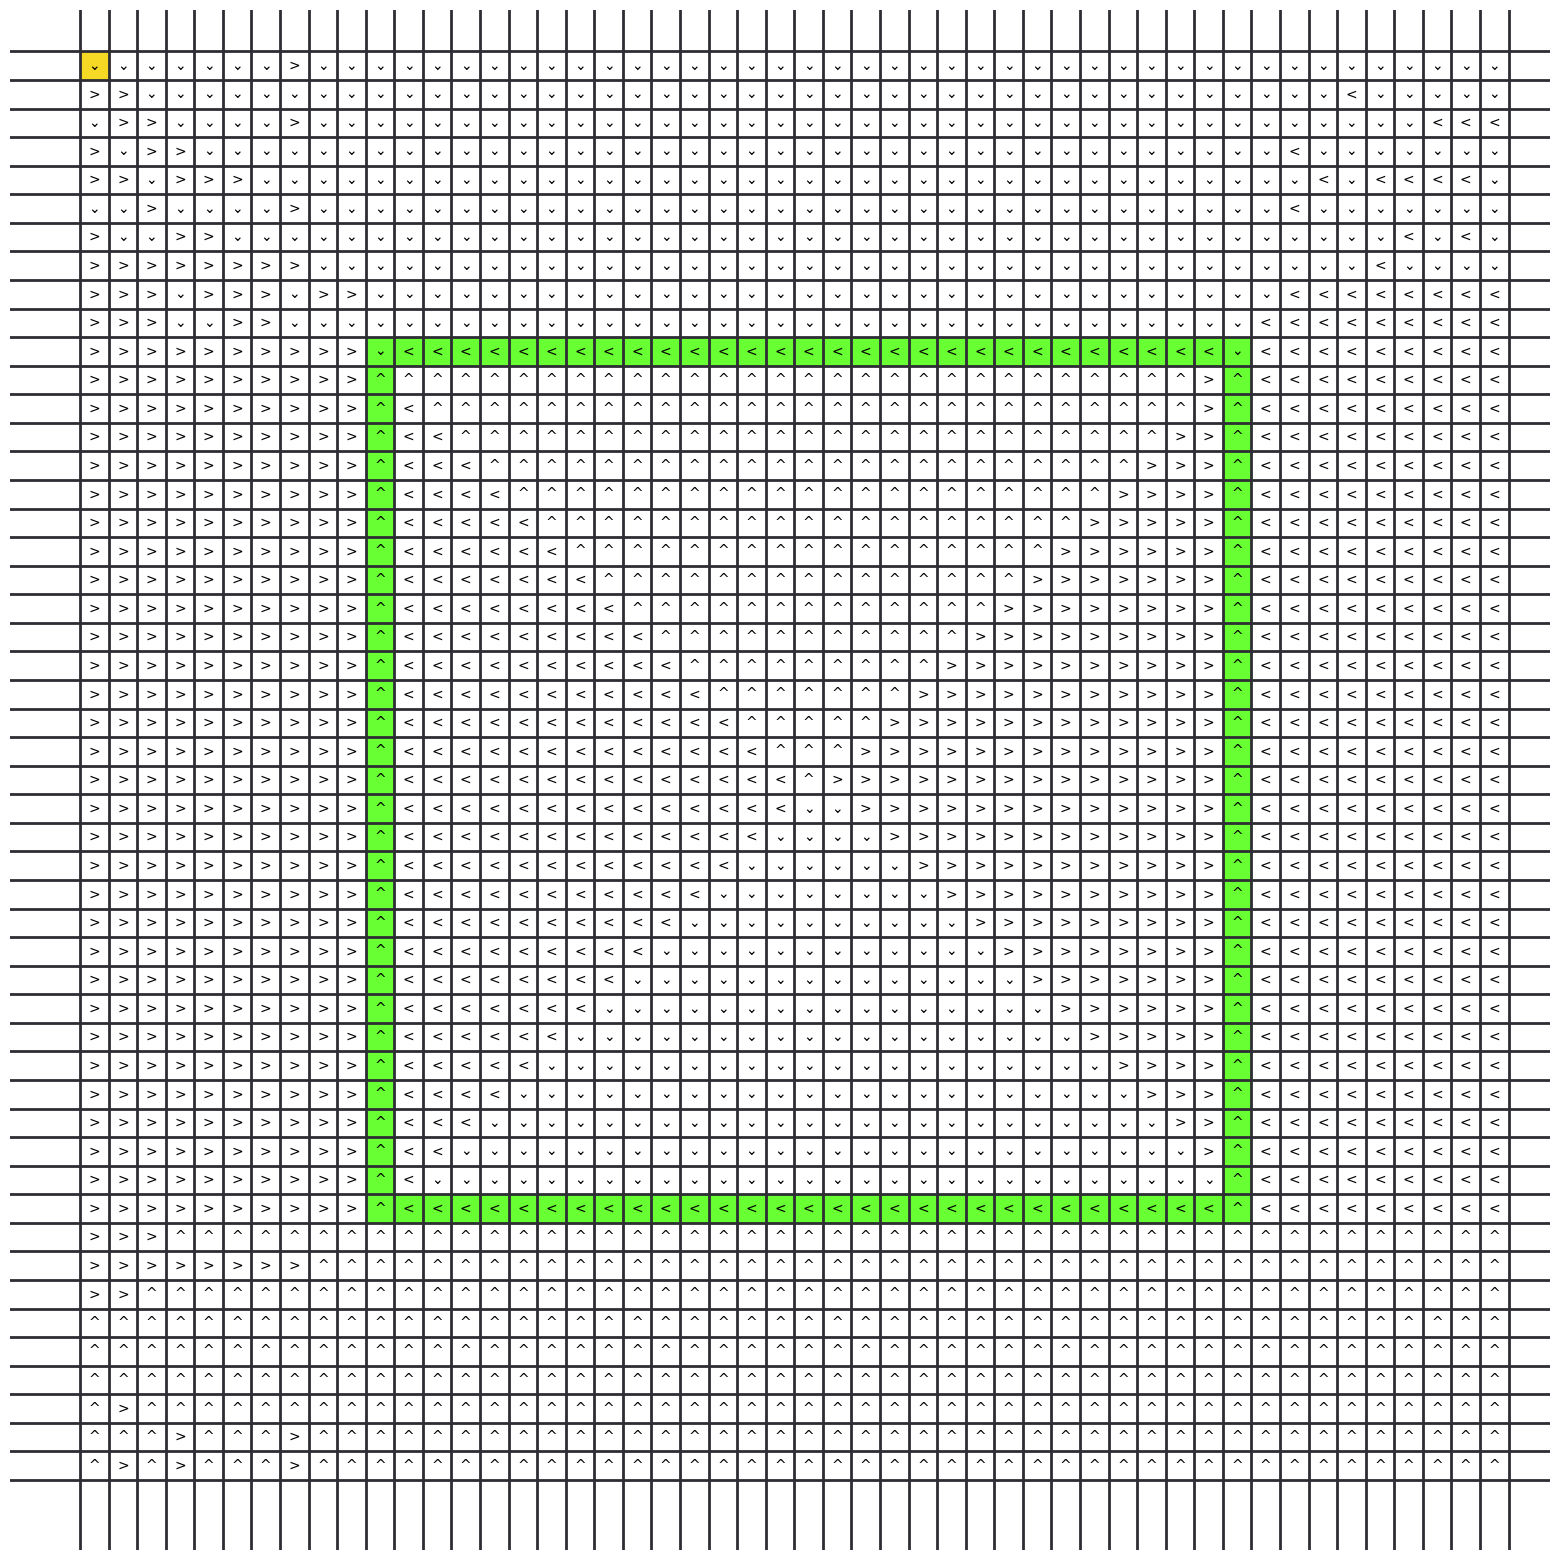

In [1]:
from drawing import Drawing

env, agent = Drawing().train()

# Visualización de los valores y de de la política
env.plot_rainbow()
env.plot_policy(agent.policy)
